In [6]:
import wave

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

import haar

In [7]:
wf = wave.open("record.wav", "rb")
dn = np.frombuffer(wf.readframes(wf.getnframes()), dtype="h")
w, s = haar.compute_haar_wrapper(dn)

Length: 119808. Max Layers: 16.870364719583403


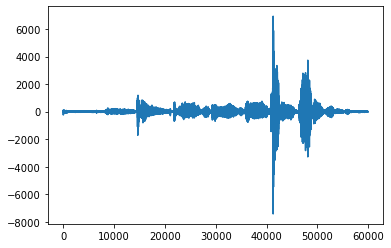

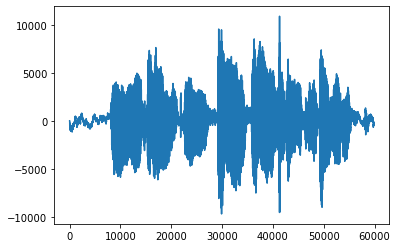

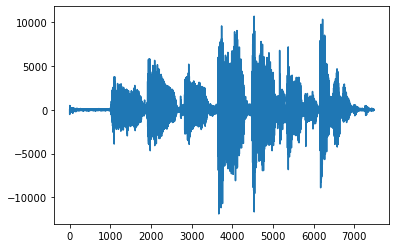

In [18]:
plt.figure()
plt.plot(w[1])
plt.figure()
plt.plot(s[1])
plt.figure()
plt.plot(w[4])
plt.show()

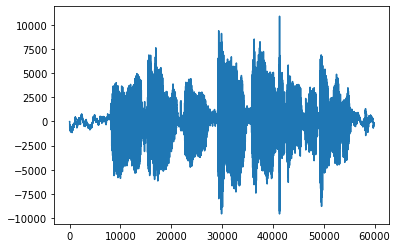

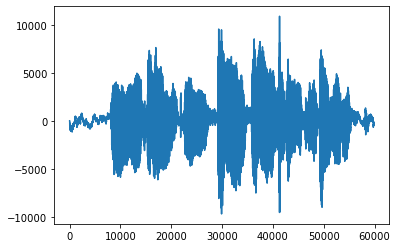

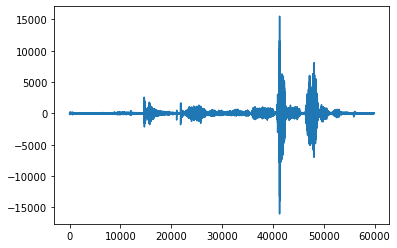

In [17]:
n = 1
s_hat2x, s_diff = haar.reconstruct(n + 1, s, w)

plt.figure()
plt.plot(s_hat2x)
plt.figure()
plt.plot(s[n])
plt.figure()
plt.plot(s_diff)

haar.save_sample("recon{}.wav".format(n), s_hat2x, n)

Length: 128. Max Layers: 7.0


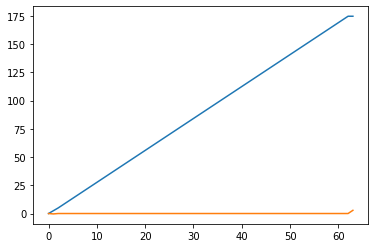

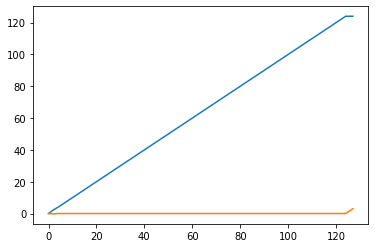

In [10]:
a = np.linspace(0, 128, 128, endpoint=False)
shortw, shorts = haar.compute_haar_wrapper(a, 2)
comb = (shortw[2] + shorts[2]) / np.sqrt(2)
# comb2x = signal.resample(comb, comb.shape[0]*2)
comb2x = haar.my_average_us2x(comb)
plt.figure()
plt.plot(comb2x)
plt.plot(shorts[1] - comb2x)

shat = (comb2x + shortw[1]) / np.sqrt(2)
shat2x = haar.my_average_us2x(shat)
plt.figure()
plt.plot(shat2x)
plt.plot(shorts[0] - shat2x)